In [54]:
import os
import pandas as pd
import numpy as np
try:
    from db import db
except ModuleNotFoundError:
    #print(os.path.abspath(os.curdir))
    os.chdir('..') # set werkdirectory 1 niveau terug naar root folder
    from db import db
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "DejaVu Sans"

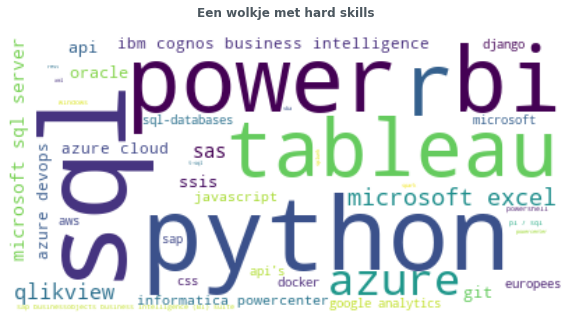

In [55]:
sql = """select
v.topic
,count(distinct t.organization) as frequencies
from
doc_ner_software as v
inner join crawled_details as d on v.doc_id = d.doc_id
inner join doc_topic as t on v.doc_id = t.doc_id
group by
v.topic
having count(distinct t.organization)  > 1
order by 2 desc"""
software = db.read_sql(sql)
software.set_index('topic', inplace=True)
color = 'white'
cloud = WordCloud(max_words=40, background_color=color).generate_from_frequencies(software.to_dict()['frequencies'])
plt.figure(figsize=(10,12))  
plt.title("Een wolkje met hard skills", 
          color ='#4c575f', 
          size=12, 
          weight=600,
          loc='center',
          pad=20)
plt.imshow(cloud, interpolation='bilinear')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.autoscale(tight=True)
plt.box(on=None)
plt.show()

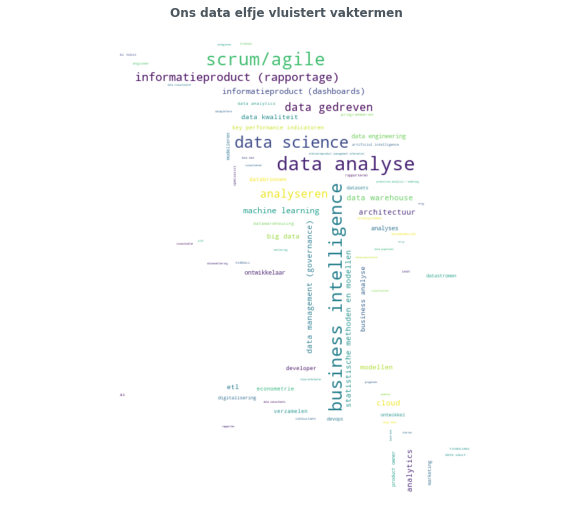

In [57]:
sql = """select
v.topic
,count(distinct t.organization) as frequencies
from
doc_ner_vakterm as v
inner join crawled_details as d on v.doc_id = d.doc_id
inner join doc_topic as t on v.doc_id = t.doc_id
group by
v.topic
having count(distinct t.organization)  > 1
order by 2 desc"""
vakterm = db.read_sql(sql)
vakterm.set_index('topic', inplace=True)
mask = np.array(Image.open('./notebooks/elf_mask.jpg'))
color = 'white'
cloud = WordCloud(max_words=1000, 
                  background_color=color,
                  mask=mask, 
                  margin=10,
                  random_state=1).generate_from_frequencies(vakterm.to_dict()['frequencies'])
plt.figure(figsize=(10,12))  
plt.title("Ons data elfje vluistert vaktermen", 
          color ='#4c575f', 
          size=12, 
          weight=600,
          loc='center',
          pad=20)
plt.imshow(cloud, interpolation='bilinear')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.autoscale(tight=False)
plt.box(on=None)
plt.show()